In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# filename = "ml-100K/testing_set_seed123_ml100k.csv"
filename = "yelp-100K/testing_set_seed123_yelp100k.csv"

test_set = pd.read_csv(f"../data/{filename}",sep=",",
    header=None,
    names=["userID", "itemID", "Rating"],)
test_set



,userID,itemID,Rating
0,0,407,1
1,0,505,5
2,0,631,5
3,0,1032,1
4,0,266,1
...,...,...,...
20109,1315,690,3
20110,1315,214,4
20111,1315,1223,4
20112,1315,997,4


In [3]:
all_users_tp = test_set.groupby('userID')['itemID'].apply(list).tolist()
all_users_tp.__len__()

1316

In [6]:
neumf = "neumf/reco_matrix_neumf_yelp100k_100.npy"
mf = "mf/reco_matrix_mf_yelp100k_100.npy"
wmf = "wmf/reco_matrix_wmf_yelp100k_100.npy"
vaecf = "vaecf/reco_matrix_vaecf_yelp100k_100.npy"
reco_matrix = np.load(f"../model_reco/yelp/{vaecf}")

In [7]:
reco_matrix = reco_matrix[0]

In [8]:

from cornac.metrics import RMSE, AUC, NDCG, Precision, Recall,HitRatio

hr=HitRatio(20)
alist=[]
sum_hr=0
for u in range(reco_matrix.shape[0]):
    x=hr.compute(all_users_tp[u],reco_matrix[u][:20])
    # print(f"x {x} tp {all_users_tp[u]} reco {reco_matrix[u][:20]}")
    # alist.append(x)
    sum_hr=sum_hr+x
    # print(x)
plain_hr=sum_hr/reco_matrix.shape[0]

plain_hr
# 0.5387062566277837
#0.5440084835630965


/Users/tahsinalamgirkheya/anaconda3/envs/bbmrec/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0.7196048632218845

In [10]:
# from NDCG import NDCG
ndcg=NDCG(20)
alist=[]
sum_ndcg=0
for u in range(reco_matrix.shape[0]):
    x=ndcg.compute(all_users_tp[u],reco_matrix[u][:20])
    
    # print(f"x {x} tp {all_users_tp[u]} reco {reco_matrix[u][:20]}")
    # alist.append(x)
    sum_ndcg=sum_ndcg+x
    # print(x)
plain_ndcg=sum_ndcg/reco_matrix.shape[0]

plain_ndcg
# 0.06877010356676778

0.09004678988071703

In [11]:

all_pds =[]
reco_matrix_fair=[]
sens="gender"
model = "vaecf"
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_1.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_2.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_3.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_4.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_5.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_6.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_7.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_8.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_9.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_10.npy"))
# all_pds.append(pd.read_csv("../results.csv",sep=",",))
# all_pds.append(pd.read_csv("../results/vaecf/gender_2.csv",sep=",",))
# all_pds.append(pd.read_csv("../results/vaecf/gender_1.csv",sep=",",))
# all_pds.append(pd.read_csv("../results/vaecf/gender_2.csv",sep=",",))
# all_pds.append(pd.read_csv("../results/vaecf/gender_3.csv",sep=",",))
# /Users/tahsinalamgirkheya/Desktop/work/reranking_fairnes/results/yelp/mf
all_pds.append(pd.read_csv(f"../results/yelp/{model}/{sens}_1.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/yelp/{model}/{sens}_2.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/yelp/{model}/{sens}_3.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/yelp/{model}/{sens}_4.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/yelp/{model}/{sens}_5.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/yelp/{model}/{sens}_6.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/yelp/{model}/{sens}_7.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/yelp/{model}/{sens}_8.csv",sep=",",))
# results/reco_mat_test.npy
for j in range(len(all_pds)):
    reco_m =[]
    for i in range(all_pds[j].__len__()):
        reco_m.append(np.array(all_pds[j].iloc[i][1:]))
    reco_matrix_fair.append(reco_m)
    



In [15]:
# rec=np.load("../results/reco_mat_test.npy")
# reco_matrix_fair.append(rec)


In [16]:
reco_matrix_fair[1][0]

array([  55,  374,   78,  205,  750,  113,  836,  635,   62,  115,    0,
        441,  321,  171,  309,   48, 1165,  468,  428,  900])

In [12]:

hr=HitRatio(20)
hrlist=[]
for r in reco_matrix_fair:
    sum_hr=0
    for u in range(reco_matrix.shape[0]):
        x=hr.compute(all_users_tp[u],r[u])
        sum_hr=sum_hr+x
    hr_occ=sum_hr/reco_matrix.shape[0]
    hrlist.append(hr_occ)
    

[plain_hr]+hrlist

[0.7196048632218845,
 0.7241641337386018,
 0.7226443768996961,
 0.7196048632218845,
 0.7104863221884499,
 0.6876899696048632,
 0.6717325227963525,
 0.6405775075987842,
 0.6177811550151976]

In [14]:

hr=NDCG(20)
hrlist=[]
for r in reco_matrix_fair:
    sum_hr=0
    for u in range(reco_matrix.shape[0]):
        x=hr.compute(all_users_tp[u],r[u])
        sum_hr=sum_hr+x
    hr_occ=sum_hr/reco_matrix.shape[0]
    hrlist.append(hr_occ)
    

[plain_ndcg]+hrlist

[0.09004678988071703,
 0.09061356720335913,
 0.09014657154612905,
 0.0895138592837527,
 0.088365568372115,
 0.0839552227373568,
 0.07835218648825404,
 0.07249024231685304,
 0.06623403985535772]

In [15]:
reco_matrix_fair[2][0]

array([ 185,  125,   48,  550,  808,  820,   62,  374,  900,  113,  750,
        634,  290,  523,  555,  512, 1018,  563,   73,  500])

In [16]:
xpoints.__len__()

NameError: name 'xpoints' is not defined

ValueError: x and y must have same first dimension, but have shapes (12,) and (8,)

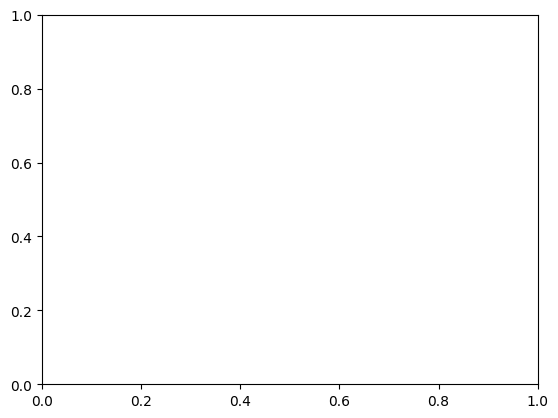

In [17]:
xpoints = [0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.3,0.4,0.5,0.6]
ypoints = hrlist

plt.plot(xpoints, ypoints)
plt.show()

In [18]:
restaurants = pd.read_csv(
    "../data/yelp-100K/i_id_mapping.csv",
    sep="\t",
   names=[ "item_id","Category","itemID"],
    header=0,
    # encoding="latin-1",
)
restaurants=restaurants.sort_values(by="itemID")

unique_categories = [
    "Active Life & Fitness",
    "Arts & Entertainment",
    "Automotive",
    "Bars & Nightlife",
    "Coffee,Tea & Desserts",
    "Drinks & Spirits",
    "Education & Learning",
    "Event Services",
    "Family & Kids",
    "Food & Restaurants",
    "Health & Beauty",
    "Home & Garden",
    "Miscellaneous",
    "Outdoor Activities",
    "Public Services & Community",
    "Shopping & Fashion",
    "Specialty Food & Groceries",
    "Sports & Recreation",
    "Technology & Electronics",
    "Travel & Transportation",
    "Asian",
]
for c in unique_categories:
    restaurants[c] = 0
for index, row in restaurants.iterrows():
    cats = row["Category"].split("|")
    for cat in cats:
        restaurants.at[index, cat] = 1

cat = restaurants[unique_categories]
# cat[:1]
item_features_numpy = cat.to_numpy()
item_features = {
    str(item_id): {"category_" + str(idx): value for idx, value in enumerate(row)}
    for item_id, row in enumerate(item_features_numpy)
}
# ids = list(range(0, 3416))
restaurants

users = pd.read_csv("../data/yelp-100K/u_id_mapping.csv", sep="\t",header=0,
    names=[ "user_id","Gender","userID"])
gender_map = {"M": 0, "F": 1}
users["Gender"] = users["Gender"].map(gender_map)
users = users.sort_values(by="userID")
users = users[["Gender", "userID"]]
user_features_numpy = users.to_numpy()
users
item_ids = restaurants["itemID"].to_numpy()




In [19]:
users

,Gender,userID
0,1,0
1,1,1
2,1,2
3,0,3
4,1,4
...,...,...
1311,0,1311
1312,1,1312
1313,1,1313
1314,0,1314


In [20]:
restaurants

,item_id,Category,itemID,Active Life & Fitness,Arts & Entertainment,Automotive,Bars & Nightlife,"Coffee,Tea & Desserts",Drinks & Spirits,Education & Learning,...,Home & Garden,Miscellaneous,Outdoor Activities,Public Services & Community,Shopping & Fashion,Specialty Food & Groceries,Sports & Recreation,Technology & Electronics,Travel & Transportation,Asian
0,34,Food & Restaurants|Drinks & Spirits,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,250,Food & Restaurants|Drinks & Spirits,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,759,Asian|Food & Restaurants,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1085,Food & Restaurants,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1122,Travel & Transportation,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,188255,Food & Restaurants,1267,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1268,188310,Food & Restaurants,1268,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1269,188449,Food & Restaurants|Bars & Nightlife,1269,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1270,188454,Food & Restaurants,1270,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
import os
os.chdir("/Users/tahsinalamgirkheya/Desktop/work/reranking_fairnes")


In [22]:
nusers = reco_matrix.shape[0]
# new_rmatrix = np.
new_rmatrix = np.zeros(( nusers, 20), dtype=int)
for i in range(nusers):
    new_rmatrix[i]=reco_matrix[i][:20]
new_rmatrix.shape


(1316, 20)

In [23]:
from mymetrics.GenrePrecisionMulti import GenrePrecisionMulti
from mymetrics.GenreNDCGMulti import GenreNDCGMulti
from mymetrics.GenreNDCG import GenreNDCG
####Import Metrics####
# from mymetrics.GenrePrecision import GenrePrecision

top_k = 20
###intialize them
gp = GenrePrecisionMulti(users, unique_categories, top_k)
gn = GenreNDCGMulti(users, unique_categories, top_k)
gn_old = GenreNDCG(users, unique_categories, top_k)


In [24]:
gp_plain = gp.compute(new_rmatrix, restaurants, "Gender")
gp_plain

(0.06695307437286924,
 array([6.64924506e-04, 1.12076239e-02, 6.35348479e-04, 1.22882563e-03,
        1.07083963e-02, 1.58761204e-03, 6.08112550e-05, 8.43575373e-03,
        4.43757807e-05, 5.99428359e-03, 5.43935936e-05, 1.80790218e-05,
        2.41894963e-04, 4.73451230e-04, 9.89689479e-04, 2.57770849e-04,
        2.18875907e-03, 2.67898232e-04, 6.28069912e-06, 1.15274856e-02,
        1.03594164e-02]))

In [25]:
gn_plain = gn.compute(new_rmatrix, restaurants, "Gender")
gn_plain

(0.023505144202160773,
 array([2.49418844e-04, 3.75173295e-03, 2.06268008e-04, 3.68259706e-04,
        4.02081934e-03, 4.00795665e-04, 1.58136270e-05, 2.63622428e-03,
        1.08131574e-05, 2.28013922e-03, 5.57786798e-05, 9.03760416e-06,
        5.94496561e-05, 1.37763426e-04, 3.17035259e-04, 1.12137259e-04,
        1.22857608e-03, 1.28346952e-04, 1.63857391e-06, 4.53068037e-03,
        2.98441554e-03]))

In [26]:
i=0
xlist=[]
for r in reco_matrix_fair:
    i=i+1
    x=gp.compute(np.array(r), restaurants, "Gender")
    xlist.append(x[0])
    # print(x)
    print(f"{x[0]} is the bias score for b={i}")


0.06430448203211343 is the bias score for b=1
0.0625473967773949 is the bias score for b=2
0.06101795066853241 is the bias score for b=3
0.049879598410924424 is the bias score for b=4
0.026085907441669658 is the bias score for b=5
0.02672525521943701 is the bias score for b=6
0.03173096850337004 is the bias score for b=7
0.03475521317592847 is the bias score for b=8


In [27]:
[gp_plain[0]]+xlist

[0.06695307437286924,
 0.06430448203211343,
 0.0625473967773949,
 0.06101795066853241,
 0.049879598410924424,
 0.026085907441669658,
 0.02672525521943701,
 0.03173096850337004,
 0.03475521317592847]

In [28]:
i=0
xlist=[]
for r in reco_matrix_fair:
    i=i+1
    x=gn.compute(np.array(r), restaurants, "Gender")
    xlist.append(x[0])
    # print(x)
    print(f"{x[0]} is the bias score for b={i}")


0.022828560063039193 is the bias score for b=1
0.02200023357038957 is the bias score for b=2
0.021100836512066512 is the bias score for b=3
0.01657568857403267 is the bias score for b=4
0.008017993774180446 is the bias score for b=5
0.008237166054467702 is the bias score for b=6
0.011207566010767115 is the bias score for b=7
0.012703999548555622 is the bias score for b=8


In [31]:
[gn_plain[0]]+xlist

[0.023505144202160773,
 0.022828560063039193,
 0.02200023357038957,
 0.021100836512066512,
 0.01657568857403267,
 0.008017993774180446,
 0.008237166054467702,
 0.011207566010767115,
 0.012703999548555622]